<a href="https://colab.research.google.com/github/pschorey/Valpo_IT533/blob/main/IT_533_STEM_Module7_DeepLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Module 7: Neural Networks and Deep Learning**
Imagine you have lots of data--Big Data, as in 1,000,000 tuples and more per day--and need to build a classification system with utmost reliability because if you're wrong, the consequences may be detrimental to people or property. Would you use a simple tree? Or a k Nearest Neighbor? Or a Random Forest? Or would you want a system that combines a number of self-optimizing algorithm runs with an element of randomization and voting in order to give you the most reliable output? 

That, then would be a Deep Learning Network. **Deep Learning means nothing more than a Neural Network with multiple hidden layers,** in which data is summarized and analyzed and summarized and analyzed and so on. These pictures say it all:

**A Simple Neural Network**
<div>
<center>
<img src="https://raw.githubusercontent.com/shstreuber/Data-Mining/master/images/simplenn_regression.png" width="350">
</div>

**A Deep Neural Network**
<div>
<center>
<img src="https://raw.githubusercontent.com/shstreuber/Data-Mining/master/images/deepnn_regression.png" width="600">
</div>

At the end of this module, you will be able to:

* Configure 2 simple and 2 deep learning Regression Networks 
* Describe how a Deep Neural Network works
* Configure TensorFlow and Keras
* Solve a simple Deep Learning problem
* Compare regular Neural Network output with Deep Learning output

To get started, please watch this instructor video:

In [ ]:
from IPython.display import HTML
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/RkiTL_T8VsY" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

/usr/local/lib/python3.9/dist-packages/IPython/core/display.py:724: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


#**What is Tensorflow?**
Essentially, TensorFlow (a Google product) is an end-to-end open source machine learning **platform**. As a platform, it contains a number of libraries, or packages, the most well-known of which is Keras.

The **GOAL** of TensorFlow is to train and run deep neural networks for handwritten digit classification, image recognition, word embeddings, recurrent neural networks, sequence-to-sequence models for machine translation, natural language processing, and PDE (partial differential equation) based simulations.

##**Sooooo ... what is a Tensor?**
The vocabulary here may sound technical and daunting, but there are a few very simple concepts hiding behind it. A Tensor is simply a multidimensional array:

* Scalar = 0D Tensor
* Vector = 1D Tensor
* Matrix = 2D Tensor
* Cube = 3D Tensor

Thereby, we can deduce that a 4-D tensor is a vector of cubes, 5-D tensor is a matrix of cubes, 6-D tensor is a cube of cubes, etc. Take a look at the graphic below:

<div>
<center>
<img src="https://raw.githubusercontent.com/shstreuber/Data-Mining/master/images/tensor.png" width="600">
</div>

##**And How does it Work?**
Working with TensorFlow is  basically like setting up any other Classification:
0. You set up your libraries and load your data
1. You do your EDA (Exploratory Data Analysis) to see how the data is distributed and to determine what the class attribute in the dataset should be. 
2. Preprocess the data (remove n/a, transform data types as needed, deal with missing data) and THEN normalize the data so we can apply the model weights without problems.
3. Split the data into a training set and a test set
4. Build the model based on the training set
5. Test the model on the test set
6. Determine the quality of the model

#**0. Preparation and Setup**
To wrap our head around the process of setting up a Deep Learning model, we will work with a dataset with which we are already familiar: The adult dataset.

In [ ]:
import tensorflow as tf # This tells Colab that we are using TensorFlow

from tensorflow import keras # This is the main TensorFlow library
from tensorflow.keras import layers # We are building a Neural Network with several hidden layers
from tensorflow.keras.layers.experimental import preprocessing

print("Current TensorFlow version is", tf.__version__)

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns # for visualization
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")
np.random.seed(42)

#Reading in the data as adult dataframe
adult = pd.read_csv("https://raw.githubusercontent.com/shstreuber/Data-Mining/master/data/adult.data.simplified.csv")
adult.head()

Current TensorFlow version is 2.12.0


,age,workclass,education,educationyears,maritalstatus,occupation,relationship,race,sex,hoursperweek,nativecountry,incomeUSD
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,43747
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,38907
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,25055
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,26733
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,23429


#**1. Exploratory Data Analysis**
How many rows does the adult dataset have? What are the attribute types? What is the mean, median, and mode of the incomeUSD attribute? 

These are all questions to solve. Use the code rows below to find the answers:

In [ ]:
adult.describe()

,age,educationyears,hoursperweek,incomeUSD
count,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,10.080679,40.437456,56583.900587
std,13.640433,2.572720,12.347429,44374.594314
min,17.000000,1.000000,1.000000,20002.000000
25%,28.000000,9.000000,40.000000,29994.000000
50%,37.000000,10.000000,40.000000,39732.000000
75%,48.000000,12.000000,45.000000,49631.000000
max,90.000000,16.000000,99.000000,199965.000000


In [ ]:
adult.dtypes

age                int64
workclass         object
education         object
educationyears     int64
maritalstatus     object
occupation        object
relationship      object
race              object
sex               object
hoursperweek       int64
nativecountry     object
incomeUSD          int64
dtype: object

In [ ]:
adult.incomeUSD.mode()

0    29342
1    42427
Name: incomeUSD, dtype: int64

answers:

32561 rows

age int, workclass obj, education obj, educationyears int, maritalstatus obj, occupation obj, relationship obj, race obj, sex obj, hoursperweek int, nativecountry obj, incomeUSD int

incomeUSD mean 56,583 median 39,732 mode 42,427

# **A2. Regression**
As with the simple Neural Networks you have encountered already, preprocessing is a bit more involved than with, say, a Random Forest algorithm.
<div>
<center>
<img src="https://raw.githubusercontent.com/shstreuber/Data-Mining/master/images/TF_Process1.png" width="600">
</div>

In our first case study, we will be working on Regression, which means we will be predicting ONE NUMBER, i.e. the expected IncomeUSD

##**2.1 Reducing the Data**


##Your Turn
You have done this before with the insurance dataset: Build an adult_dl dataset consisting of age, educationyears, race, hoursperweek, and incomeUSD as the class attribute

In [ ]:
adult_dl = pd.DataFrame(adult, columns = ['age', 'educationyears', 'race','hoursperweek','incomeUSD'])
adult_dl.head()

,age,educationyears,race,hoursperweek,incomeUSD
0,39,13,White,40,43747
1,50,13,White,13,38907
2,38,9,White,40,25055
3,53,7,Black,40,26733
4,28,13,Black,40,23429


##**2.2 Preparing the Data for use with TensorFlow**
In this section, you will see that preparing data to work with a Deep Learning Neural Network requires the same kind of preprocessing that you have already encountered:



### **2.2.1 Encoding Categorical Variables**
Did you remember that Neural Networks (regular **and** in TensorFlow) require only numeric data? Well ... "race" is quite obviously categorical, so we need to convert it to one-hot format. We do this with pd.dummies()

In [ ]:
adult_dl = pd.get_dummies(adult_dl, columns=['race'], prefix='', prefix_sep='')
adult_dl.head()

,age,educationyears,hoursperweek,incomeUSD,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White
0,39,13,40,43747,0,0,0,0,1
1,50,13,13,38907,0,0,0,0,1
2,38,9,40,25055,0,0,0,0,1
3,53,7,40,26733,0,0,1,0,0
4,28,13,40,23429,0,0,1,0,0


### **2.2.2 Splitting into Training and Test Set**
We will do this first since we will want to reduce the amount of data that we will have to normalize.

In [ ]:
train_dataset = adult_dl.sample(frac=0.8, random_state=0)
test_dataset = adult_dl.drop(train_dataset.index)

### **2.2.3 Splitting Features from Labels**
Separate the target value, the "label", from the features. This label is the value that you will train the model to predict--in our case, we want to predict incomeUSD.

In [ ]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('incomeUSD')
test_labels = test_features.pop('incomeUSD')

### **2.2.4 Normalizing**
Except for age and educationyears, which are both measured in years, all other variables are measured in **different units**. This also puts them on **different scales**. Since, in a Neural Network, we need all our values on the **same scale**, so that the weights can be applied uniformly, we need to normalize! One reason this is important is because the features are multiplied by the model weights. So the scale of the outputs and the scale of the gradients are affected by the scale of the inputs.

The [**preprocessing.Normalization layer**](https://www.tensorflow.org/api_docs/python/tf/keras/layers/experimental/preprocessing/Normalization) is a clean and simple way to build that preprocessing into your model. And YES--by creating the normalization layer, you effectively just started building your TensorFlow model:

In [ ]:
normalizer = preprocessing.Normalization(axis=-1)

Now we apply the normalizer to the data:

In [ ]:
normalizer.adapt(np.array(train_features))

This calculates the mean and variance, and stores them in the layer.

In [ ]:
print(normalizer.mean.numpy())

[[3.8507965e+01 1.0091838e+01 4.0392166e+01 9.2134075e-03 3.2746013e-02
  9.5973052e-02 8.4840171e-03 8.5358381e-01]]


When the layer is called it returns the input data, with each feature independently normalized:

In [ ]:
first = np.array(train_features[:1])

with np.printoptions(precision=2, suppress=True):
  print('Original data:', first)
  print()
  print('Normalized data:', normalizer(first).numpy())

Original data: [[27 10 44  0  0  0  0  1]]

Normalized data: [[-0.84 -0.04  0.29 -0.1  -0.18 -0.33 -0.09  0.41]]


# **A3. Building the Models**
There is always a specific process with which to build a TensorFlow model:
<div>
<center>
<img src="https://raw.githubusercontent.com/shstreuber/Data-Mining/master/images/TF_Process2.png" width="600">
</div>

1. First, we set up the **keras SEQUENTIAL MODEL**. This is the framework inside of which we are going to define the layers. Sequential = layers are sequentially next to each other (either “stacked” or left-to-right, depending on how you draw them).
---
2. Inside the Sequential model, we define the **LAYERS**. To do this, we need to know the following:
* **Shape**: This is the number of attributes we use as input for the model
---
3. In the next step, we define HOW we want the model to run, that is to **COMPILE**, with model.compile(). To do this, we need to know the following:
* **Optimizer** = gradient descent function (i.e. which function we use to optimize the step-down of the weights); adam = adaptive learning rate optimization algorithm
* **Loss Function**= evaluation of the ŷ vs the ground truth
* **Metrics** = evaluation criterion, here accuracy.
---
4. Then, we **FIT** the model to the training set with model.fit(). To do this, we need to know the following:
* **Epoch**: One Epoch is when an ENTIRE dataset is passed forward and backward through the neural network only ONCE. If one epoch is too big to feed to the computer at once we can divide it in several smaller batches
* **Batch size**: Depending on the number of needed features in your dataset (you should reduce these to NO MORE THAN 6), the computing effort can be too intense. Just like you would not each a whole sandwich in one bite, the machine does better when processing the data in smaller bites called batches. The standard batch size is 32.
---
5. Lastly (and in purple!), we use our model to **PREDICT** the values for the test set with model.predict()
---
**How we choose the LOSS FUNCTION** for step 3 depends on the type of calculation we need our Neural Network to perform:
* If the output variable is **continuous**, we are performing a regression, so the loss function is **mean squared error or MSE**
* If the output variable is **binary**, we are performing a classification, so the loss function is **binary_crossentropy**
* If the output variable is **categorical** with more than two labels, we are still performing a classification, but now the loss function is **categorical_crossentropy**



##**3.1 REGRESSION: Using one Variable to predict incomeUSD in a Simple Neural Network**
We will use age to predict incomeUSD. To do so, we will use a keras.Sequential model. This model represents a sequence of steps. In this case there are two steps:

1. Normalize the input ['age'].
2. Apply a linear transformation () to produce 1 output using layers.Dense.

The number of inputs can either be set by the input_shape argument, or automatically when the model is run for the first time.

In [ ]:
# First, we build the normalization layer:
age_new = np.array(train_features['age'])

age_normalizer = preprocessing.Normalization(input_shape=[1,], axis=None)
age_normalizer.adapt(age_new)

In [ ]:
# Now we build the framework that holds all the models:
age_model = tf.keras.Sequential([
    age_normalizer,
    layers.Dense(units=1)
])

age_model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_6 (Normalizat  (None, 1)                3         
 ion)                                                            
                                                                 
 dense_14 (Dense)            (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________


Do you see how the Output Shape contains 1? That's only one layer, so a Simple Neural Network. 

Now we can configure the training procedure using the Model.compile() method. The most important arguments to compile are the loss and the optimizer since these define what will be optimized (mean_absolute_error) and how (using the [optimizers.Adam](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam)).

In [ ]:
age_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.9),
    loss='mean_absolute_error')

Once the model is configured, we use Model.fit() to train it (give this about 1-2 minutes):

In [ ]:
%%time
history = age_model.fit(
    train_features['age'], train_labels,
    epochs=100,
    # suppress logging
    verbose=1,
    # Calculate validation results on 20% of the training data. Validation means that we test as we go, on a 20% subset of the training data
    validation_split = 0.2)

Epoch 1/100
652/652 [==============================] - 1s 1ms/step - loss: 56669.4141 - val_loss: 55204.1406
Epoch 2/100
652/652 [==============================] - 1s 1ms/step - loss: 56082.6406 - val_loss: 54617.3164
Epoch 3/100
652/652 [==============================] - 1s 1ms/step - loss: 55495.8047 - val_loss: 54030.5391
Epoch 4/100
652/652 [==============================] - 1s 1ms/step - loss: 54908.9844 - val_loss: 53443.8398
Epoch 5/100
652/652 [==============================] - 1s 1ms/step - loss: 54322.2891 - val_loss: 52857.0781
Epoch 6/100
652/652 [==============================] - 1s 1ms/step - loss: 53735.5430 - val_loss: 52270.3984
Epoch 7/100
652/652 [==============================] - 1s 1ms/step - loss: 53148.7773 - val_loss: 51683.6914
Epoch 8/100
652/652 [==============================] - 1s 1ms/step - loss: 52561.9883 - val_loss: 51097.0117
Epoch 9/100
652/652 [==============================] - 1s 1ms/step - loss: 51975.2734 - val_loss: 50510.2891
Epoch 10/100
652/65

In [ ]:
train_features['age']

Visualize the model's training results (you must run the code fields to see the graph):

In [ ]:
x = tf.linspace(0.0, 250, 251)
y = age_model.predict(x)

8/8 [==============================] - 0s 1ms/step


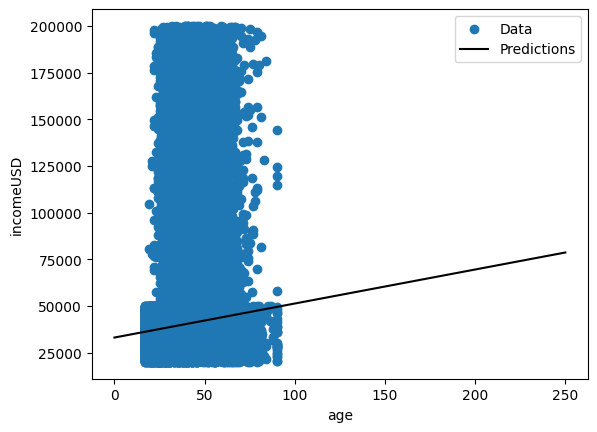

In [ ]:
def plot_age(x, y):
  plt.scatter(train_features['age'], train_labels, label='Data')
  plt.plot(x, y, color='k', label='Predictions')
  plt.xlabel('age')
  plt.ylabel('incomeUSD')
  plt.legend()
plot_age(x,y) 

As you can see, the output here is abysmal. Let's see if we have better luck with the next model

##Your Turn
You've seen the model build -- well, you haven't, really. 
1. Copy the code above into the code section below and turn verbose on
2. Set the number of epochs to 10, so you don't have to wait so long
3. Observe how the loss function decreases over each epoch:

In [ ]:
history = age_model.fit(
    train_features['age'], train_labels,
    epochs=10,
    # 0 suppress logging
    verbose=1,
    # Calculate validation results on 20% of the training data. Validation means that we test as we go, on a 20% subset of the training data
    validation_split = 0.2)

Now let's test this on the test set and collect the results so we can inspect them at the end of this file:

In [ ]:
test_results = {}

test_results['age_model'] = age_model.evaluate(
    test_features['age'],
    test_labels, verbose=1)

204/204 [==============================] - 0s 914us/step - loss: 25974.4766


This is a regression with a single variable--way too simplistic for our purposes! On to bigger and better things!

## **3.2 REGRESSION: Using Multiple Variables to Predict incomeUSD in a Simple Neural Network**

You can use an almost identical setup to make predictions based on multiple inputs. This model still does the same y - mx + b except that m is a matrix and b is a vector.

This time, we use the Normalization layer that was adapted to the whole dataset.

In [ ]:
linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=1)
])

When you call the model, its weight matrices will be built. You can see that the kernel (the m in y = mx + b) has a shape of (8,1).

In [ ]:
linear_model.layers[1].kernel

<tf.Variable 'dense_1/kernel:0' shape=(8, 1) dtype=float32, numpy=
array([[-0.272452  ],
       [-0.06275898],
       [-0.5498391 ],
       [-0.17239505],
       [ 0.6547526 ],
       [-0.05777085],
       [ 0.01960403],
       [-0.51017416]], dtype=float32)>

Now, we configure the model's runtime execution with the same compile and fit calls as for the single input age model:

In [ ]:
linear_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [ ]:
%%time
history = linear_model.fit(
    train_features, train_labels, 
    epochs=10,
    # 10 epochs, so we turn on logging
    verbose=1,
    # Calculate validation results on 20% of the training data
    validation_split = 0.2)

Epoch 1/10
652/652 [==============================] - 1s 1ms/step - loss: 56929.5508 - val_loss: 55725.9531
Epoch 2/10
652/652 [==============================] - 1s 1ms/step - loss: 56864.2969 - val_loss: 55660.9531
Epoch 3/10
652/652 [==============================] - 1s 1ms/step - loss: 56798.9922 - val_loss: 55595.9531
Epoch 4/10
652/652 [==============================] - 1s 2ms/step - loss: 56733.7148 - val_loss: 55530.9961
Epoch 5/10
652/652 [==============================] - 1s 1ms/step - loss: 56668.4805 - val_loss: 55466.0039
Epoch 6/10
652/652 [==============================] - 1s 1ms/step - loss: 56603.2148 - val_loss: 55401.0430
Epoch 7/10
652/652 [==============================] - 1s 1ms/step - loss: 56537.9492 - val_loss: 55336.0508
Epoch 8/10
652/652 [==============================] - 1s 1ms/step - loss: 56472.6875 - val_loss: 55271.0703
Epoch 9/10
652/652 [==============================] - 1s 1ms/step - loss: 56407.4648 - val_loss: 55206.1250
Epoch 10/10
652/652 [=======

Just like before, we collect the results in the test_results variable again:

In [ ]:
test_results['linear_model'] = linear_model.evaluate(
    test_features, test_labels, verbose=1)

204/204 [==============================] - 0s 897us/step - loss: 55356.3086


## Your Turn
What is the command to display the current contents of the test_results variable? Type it below and inspect the results! What do you see?

In [ ]:
#?????????? same as the last code????
test_results['linear_model'] = linear_model.evaluate(
    test_features, test_labels, verbose=1)

204/204 [==============================] - 0s 912us/step - loss: 55356.3086


## **3.3 REGRESSION: Deep Neural Network (DNN)**


The previous section implemented linear models for single and multiple inputs in a **Simple Neural Network.**



This section implements single-input and multiple-input DNN models. The code is basically the same except **the model is expanded to include some "hidden" non-linear layers**. The name "hidden" here just means not directly connected to the inputs or outputs.

These models will contain a few more layers than the linear model:

1. The normalization layer (imagine this as hidden layer 1 in the graphic below)
2. Two hidden, nonlinear, Dense layers using the relu nonlinearity (hidden layers 2 and 3 in the graphic below)
3. A linear single-output layer because we are calculating ONE regression output.

<div>
<center>
<img src="https://raw.githubusercontent.com/shstreuber/Data-Mining/master/images/deepnn_regression.png" width="600">
</div>

Both will use the same training procedure so the compile method is included in the build_and_compile_model function below.

###**Deep Neural Network Model Code Below**
Here it is! NOTE that now, we are building and configuring the layers!




In [ ]:
def build_and_compile_model(norm):
  model = keras.Sequential([                 # Here you are setting up the keras.Sequential architecture
      norm,                                  # This is the normalizer function we built before
      layers.Dense(64, activation='relu'),   # Here is the first hidden layer--64 nodes, built with the relu function
      layers.Dense(64, activation='relu'),   # Here is the second hidden layer, also built with the relu function
      layers.Dense(1)                        # Here is the Dense layer for a single output because we are working on a REGRESSION
  ])                                         # AND WE'RE DONE WITH BUILDING THE MODEL!

  model.compile(loss='mean_absolute_error',   # Now we configure the runtime for our model; the loss function is mean absolute error--makes sense for a regression!
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model

### **3.3.1 REGRESSION--One Variable**
As before, we use the age variable to predice incomeUSD

In [ ]:
dnn_age_model = build_and_compile_model(age_normalizer)

This model has quite a few more trainable parameters than the linear models.

In [ ]:
dnn_age_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 1)                3         
 ion)                                                            
                                                                 
 dense_2 (Dense)             (None, 64)                128       
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,356
Trainable params: 4,353
Non-trainable params: 3
_________________________________________________________________


Now, we train the model:

In [ ]:
%%time
history = dnn_age_model.fit(
    train_features['age'], train_labels,
    validation_split=0.2,
    verbose=1, epochs=100)

Epoch 1/100
652/652 [==============================] - 2s 3ms/step - loss: 55874.9141 - val_loss: 51376.6875
Epoch 2/100
652/652 [==============================] - 1s 1ms/step - loss: 41981.4805 - val_loss: 29146.0137
Epoch 3/100
652/652 [==============================] - 1s 1ms/step - loss: 27960.4082 - val_loss: 26000.9492
Epoch 4/100
652/652 [==============================] - 1s 1ms/step - loss: 27094.6582 - val_loss: 25814.5469
Epoch 5/100
652/652 [==============================] - 1s 1ms/step - loss: 26985.9883 - val_loss: 25751.2285
Epoch 6/100
652/652 [==============================] - 1s 1ms/step - loss: 26934.9160 - val_loss: 25720.2266
Epoch 7/100
652/652 [==============================] - 1s 1ms/step - loss: 26906.8184 - val_loss: 25703.3926
Epoch 8/100
652/652 [==============================] - 1s 1ms/step - loss: 26888.0586 - val_loss: 25693.5469
Epoch 9/100
652/652 [==============================] - 1s 1ms/step - loss: 26881.3145 - val_loss: 25686.4844
Epoch 10/100
652/65

In [ ]:
train_labels

22278     27267
8950      26135
7838      46605
16505     30635
19140    189367
          ...  
12877     29038
13288     34232
2751      44265
11903     41255
17632     22011
Name: incomeUSD, Length: 26049, dtype: int64

And we plot the outcomes:

8/8 [==============================] - 0s 1ms/step


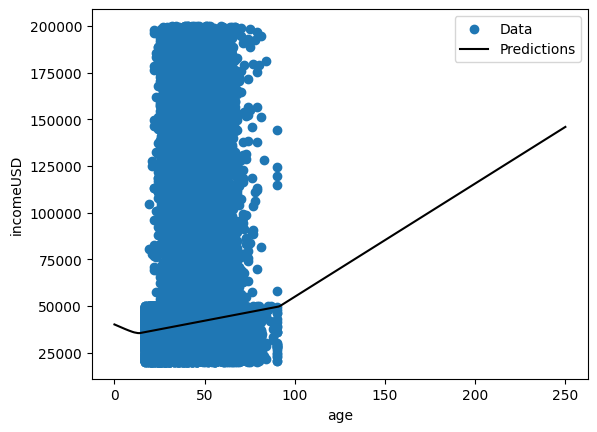

In [ ]:
x = tf.linspace(0.0, 250, 251)
y = dnn_age_model.predict(x)

plot_age(x, y)

Wow! Our model does a much better job! But is it a good job? Not yet.

And we collect the test results:

In [ ]:
test_results['dnn_age_model'] = dnn_age_model.evaluate(
    test_features['age'], test_labels,
    verbose=1)

204/204 [==============================] - 0s 925us/step - loss: 25973.5781


### **3.3.2 REGRESSION: Multiple Variables**
If you repeat this process using all the inputs it slightly improves the performance on the validation dataset.

In [ ]:
dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 8)                17        
 n)                                                              
                                                                 
 dense_5 (Dense)             (None, 64)                576       
                                                                 
 dense_6 (Dense)             (None, 64)                4160      
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,818
Trainable params: 4,801
Non-trainable params: 17
_________________________________________________________________


In [ ]:
%%time
history = dnn_model.fit(
    train_features, train_labels,
    validation_split=0.2,
    verbose=1, epochs=100)

Epoch 1/100
652/652 [==============================] - 1s 2ms/step - loss: 55144.1875 - val_loss: 48407.2070
Epoch 2/100
652/652 [==============================] - 1s 1ms/step - loss: 35579.1211 - val_loss: 25630.1582
Epoch 3/100
652/652 [==============================] - 1s 1ms/step - loss: 26287.4648 - val_loss: 24993.0977
Epoch 4/100
652/652 [==============================] - 1s 1ms/step - loss: 26097.0410 - val_loss: 24935.7148
Epoch 5/100
652/652 [==============================] - 1s 1ms/step - loss: 26051.6582 - val_loss: 24901.4609
Epoch 6/100
652/652 [==============================] - 1s 1ms/step - loss: 26016.6895 - val_loss: 24876.5781
Epoch 7/100
652/652 [==============================] - 1s 2ms/step - loss: 25992.0742 - val_loss: 24859.9277
Epoch 8/100
652/652 [==============================] - 1s 2ms/step - loss: 25966.9023 - val_loss: 24843.0625
Epoch 9/100
652/652 [==============================] - 1s 2ms/step - loss: 25947.7012 - val_loss: 24835.1055
Epoch 10/100
652/65

Let's see if our predictions come closer to the actual data distribution (run the code below to see the graph):

In [ ]:
%%time
history = dnn_model.fit(
    train_features, train_labels,
    validation_split=0.2,
    verbose=1, epochs=0)



CPU times: user 69.8 ms, sys: 1.97 ms, total: 71.8 ms
Wall time: 77.7 ms


204/204 [==============================] - 0s 867us/step
10       167514
13        22373
19       137281
28        22624
40        31109
          ...  
32535     24521
32543     47033
32550     23296
32551     42290
32552     45317
Name: incomeUSD, Length: 6512, dtype: int64
[[48305.227]
 [43390.516]
 [68667.72 ]
 ...
 [42715.39 ]
 [33704.98 ]
 [42996.754]]


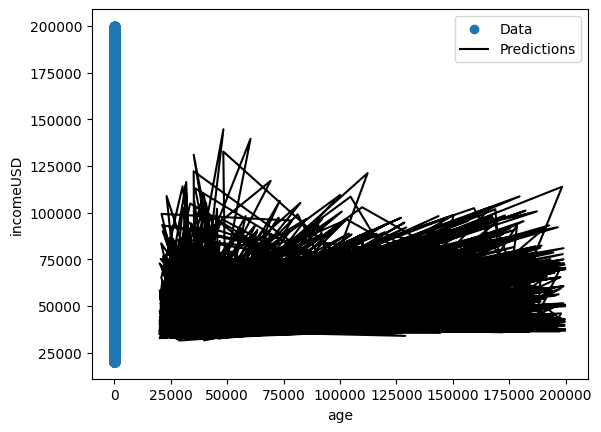

In [ ]:
#fubar! not working right.....

test_predictions = dnn_model.predict(test_features).flatten()

'''
a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [incomeUSD]')
plt.ylabel('Predictions [incomeUSD]')
lims = [0, 100]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)
'''
def plot_age(x, y):
  plt.scatter(train_features['age'], train_labels, label='Data')
  plt.plot(x, y, color='k', label='Predictions')
  plt.xlabel('age')
  plt.ylabel('incomeUSD')
  plt.legend()
#plot_age(x,y) 


plot_age(test_labels, test_predictions)
print(test_labels)
print(test_predictions)

Now we can predict our test values

In [ ]:
test_predictions = dnn_model.predict(test_features).flatten()

204/204 [==============================] - 0s 804us/step


As before, we collect the results on the test set in our test_results variable:

In [ ]:
test_results['dnn_model'] = dnn_model.evaluate(test_features, test_labels, verbose=0)
test_results

{'age_model': 25974.4765625,
 'linear_model': 55356.30859375,
 'dnn_age_model': 25973.578125,
 'dnn_model': 24855.8671875}

# **A4. Comparing all 4 models**
Now that all the models are trained check the test-set performance and see how they did:

In [ ]:
pd.DataFrame(test_results, index=['Mean absolute error [incomeUSD]']).T

,Mean absolute error [incomeUSD]
age_model,25974.476562
linear_model,55356.308594
dnn_age_model,25973.578125
dnn_model,24855.867188


## Your Turn

Which model performs the best? If you think about how each of the 4 models was built, why does your chosen model perform best?


The dnn_model had a slightly lower mean absolute error of 24,855, but all the models were pretty bad.

#**B2. Classification**
In the previous section, you have learned how a Deep Learning Network works and how to build one that will predict one numeric value. 

**A Deep Neural Network--Regression**
<div>
<center>
<img src="https://raw.githubusercontent.com/shstreuber/Data-Mining/master/images/deepnn_regression.png" width="600">
</div>

In this module, we will start with a Deep Learning NN for Classification purposes. Instead of producing ONE numeric value, we will be configuring it to yield categorical output. This means that you'll see as many nodes in the output layer as there are level to your target categories, like the two below.

**A Deep Neural Network--Classification**
<div>
<center>
<img src="https://raw.githubusercontent.com/shstreuber/Data-Mining/master/images/deepnn_classification2layers.png" width="600">
</div>

At the end of this section, you will be able to:

* Configure a deep learning Classification Network 
* Distinguish the activation functions in the output layer for classifications from those for regression
* Apply regular data classification techniques to image classification
* Describe the special cases of Convolutional Neural Networks
* Solve a simple classification problem

To get started, please watch this great video that shows you where we are going with this (and if you don't remember the content from the instructor video any more, please [review that](https://youtu.be/RkiTL_T8VsY), as well):


In [ ]:
from IPython.display import HTML
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/vF21cC-8G1U" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

###**The Problem**
In the previous section, we used a regression Deep Learning network to predict incomeUSD and age. We will start this section with predicting a categorical variable in our adult dataset: Race.

You will see that setting up a Deep Learning model for a simple classification is very similar to building a regression model. In fact, the only difference, really, is in the output layer. For preprocessing, there is no difference from what we did before; in fact, in the previous model, we already prepared the "race" variable for the output layer by one-hot encoding it. Below is a summary of the code with comments

In [ ]:
# Downsizing the Dataset to just the numeric attributes
adult_dl = pd.DataFrame(adult, columns = ['age', 'educationyears', 'race','hoursperweek','incomeUSD'])

# Splitting into Training and Test Set
train_dataset = adult_dl.sample(frac=0.8, random_state=0)
test_dataset = adult_dl.drop(train_dataset.index)

# Splitting Features from Labels
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('race')
test_labels = test_features.pop('race')

In [ ]:
train_labels.head() # Let's see what the training labels look like now

22278                 White
8950                  White
7838                  White
16505    Amer-Indian-Eskimo
19140                 White
Name: race, dtype: object

In [40]:
# Encoding the output variable with pd.get_dummies
train_labels1 = pd.get_dummies(train_labels, columns=['race'], prefix='', prefix_sep='')
test_labels1 = pd.get_dummies(test_labels, columns=['race'], prefix='', prefix_sep='')

# Normalizing the input variables
normalizer = preprocessing.Normalization(axis=-1)
normalizer.adapt(np.array(train_features))

In [ ]:
train_labels1.head() # Let's see what the training labels look like encoded

,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White
22278,0,0,0,0,1
8950,0,0,0,0,1
7838,0,0,0,0,1
16505,1,0,0,0,0
19140,0,0,0,0,1


#**B3. Build the Keras Model**
Now, we can build the Sequential model and add layers one at a time until we are happy with our network architecture.

* To build the **input layer**, we need to define the number of input features. We use the **input_dim** argument and set it to 4 for the 4 input variables ('age', 'educationyears','hoursperweek','incomeUSD').
* The **output layer** will be our race attribute with 5 levels (Amer-Indian-Eskimo,	Asian-Pac-Islander,	Black,	Other,	White) 


###**How do we know the number and architecture of layers in the middle?** 

The short answer is: We don't. The longer answer is: We experiment until we get the best output the fastest. The even longer answer is: We can use various optimization strategies that can help us out somewhat. So, let's assume that trial and error has shown us that three layers is optimal. Furthermore, let's assume that we are going to build a **Dense Network**, aka a **fully connected** network structure, in which every node is connected with every node in the next layer. 

To define this architecture, we use the Dense class. We will specify the number of neurons or nodes in the layer as the first argument, and set up the activation function with the activation argument.

Speaking of **activation function**, we will use the **rectified linear unit** or ReLU activation function on the first two layers and the Softmax function in the output layer (if our output were between 0 and 1, we would use the Sigmoid function). 

###**Model Design**
So, our model looks like this:

* The model expects rows of data with 4 variables ('age', 'educationyears', 'hoursperweek', and 'incomeUSD' = the input_dim=4 argument)
* The first hidden layer has 12 nodes and uses the relu activation function.
* The second hidden layer has 8 nodes and uses the relu activation function.
* The output layer has five nodes and uses the Softmax activation function.

In [41]:
# define the Keras model
model = keras.Sequential()
#Sequential is used when the model has one input tensor and one output tensor
#from https://keras.io/guides/sequential_model/
model.add(layers.Dense(12, input_dim=4, activation='relu'))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(5, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 12)                60        
                                                                 
 dense_7 (Dense)             (None, 8)                 104       
                                                                 
 dense_8 (Dense)             (None, 5)                 45        
                                                                 
Total params: 209
Trainable params: 209
Non-trainable params: 0
_________________________________________________________________


#**B4. Compile the Keras Model**
Now that the model is defined, we can compile it. To do so, we must specify 
* the **loss function** to use to evaluate a set of weights. In our case, we will use **categorical_crossentropy**.
* the **optimizer** searches through different weights for the network and any optional metrics we would like to collect and report during training. In our case, we will define the optimizer as the efficient stochastic gradient descent algorithm “**adam**“. This is a popular version of gradient descent because it automatically tunes itself and gives good results in a wide range of problems.
* Finally, because this is a classification problem, we will collect and report the **classification accuracy**, defined via the **metrics** argument.

In [42]:
# compile the Keras model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#**B5. Train the Model**
Now that we have defined our model and compiled it, it is time to train the model on some data. We use the fit() function for this purpose. Training occurs over **epochs** and **each epoch is split into batches**.

* **Epoch**: One pass through all of the rows in the training dataset. The training process will perform a set number of iterations through the dataset  that we must specify using the 'epochs' argument.

* **Batch**: The number of dataset rows that are considered before the model weights are updated within each epoch. One epoch contains one or more batches, based on the defined 'batch_size' argument. 

For this problem, we will run for a small number of epochs (150) and use a relatively small batch size of 10.

###**How do we know the number of epochs and the batch size?**
Three words: Trial and error. Again. That's because we will be revising the model until we get the smallest loss function (aka the smallest error). Now, the model will always have **some** error, but the amount of error will level out after some point for a given model configuration. This is called model convergence.


In [51]:
# fit the Keras model on the dataset
#train_features
#train_features.dtypes
#train_labels1
#train_labels1.dtypes
#train_labels.unique()
model.fit(train_features, train_labels1, epochs=10, batch_size=100)

Epoch 1/10
261/261 [==============================] - 0s 1ms/step - loss: 0.5558 - accuracy: 0.8536
Epoch 2/10
261/261 [==============================] - 0s 1ms/step - loss: 0.5557 - accuracy: 0.8536
Epoch 3/10
261/261 [==============================] - 0s 1ms/step - loss: 0.5557 - accuracy: 0.8536
Epoch 4/10
261/261 [==============================] - 0s 1ms/step - loss: 0.5557 - accuracy: 0.8536
Epoch 5/10
261/261 [==============================] - 0s 1ms/step - loss: 0.5557 - accuracy: 0.8536
Epoch 6/10
261/261 [==============================] - 0s 2ms/step - loss: 0.5557 - accuracy: 0.8536
Epoch 7/10
261/261 [==============================] - 0s 2ms/step - loss: 0.5557 - accuracy: 0.8536
Epoch 8/10
261/261 [==============================] - 0s 2ms/step - loss: 0.5557 - accuracy: 0.8536
Epoch 9/10
261/261 [==============================] - 0s 2ms/step - loss: 0.5557 - accuracy: 0.8536
Epoch 10/10
261/261 [==============================] - 0s 2ms/step - loss: 0.5557 - accuracy: 0.8536

#**B6. Evaluate the Model**
We have trained our neural network and we can now evaluate the performance of the network on the test dataset. To evaluate your model on your training dataset, use the evaluate() function on your model and pass it the test data.

This will generate a prediction for each input and output pair and collect scores, including the average loss and any metrics you have configured, such as accuracy.

The evaluate() function will return a list with two values. The first will be the loss of the model on the dataset and the second will be the accuracy of the model on the dataset. We are only interested in reporting the accuracy, so we will ignore the loss value.

In [52]:
# evaluate the keras model
accuracy = model.evaluate(test_features, test_labels1)
print('Loss: %.2f' % (accuracy[0]*100), 'Accuracy: %.2f' % (accuracy[1]*100))

model.evaluate(test_features, test_labels1)

204/204 [==============================] - 0s 2ms/step - loss: 0.5457 - accuracy: 0.8570
Loss: 54.57 Accuracy: 85.70
204/204 [==============================] - 0s 1ms/step - loss: 0.5457 - accuracy: 0.8570


[0.5456570982933044, 0.8570331931114197]

#Your Turn
As you can tell, steps 5 and 6 above don't work (yet!), and there is also a CRITICAL error in building the Keras model under steps 3 and 4. 

This exercise tests your ability to **research** and **debug**. You already know a lot about running this same network on the same data, but as a regression problem, so NOW your job is to translate the regression problem into a classification problem for 'race'. All the building blocks you need are in this workbook.

**Here is your job:**
1. Fix the Keras model in section 3.
2. Be sure it is compiled correctly in section 4.
3. Fix the code in sections 5 and 6 so that the model will run 
4. Research how to use the predict() function to run the model on the test_features and test_labels. Remember that you will have to encode the test labels in order to use them in the output layer!

Use the fields below to work on your code.

In [66]:
#test_features
test_labels1[20:30]

,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White
93,0,1,0,0,0
95,0,0,0,0,1
97,0,0,0,0,1
99,0,0,1,0,0
100,0,0,0,0,1
101,0,0,0,0,1
104,0,0,0,0,1
105,0,0,0,0,1
106,0,0,0,0,1
107,0,0,0,0,1


In [67]:
model.predict(
    test_features[20:30], #rows 20-30 in our test set, see above...
    batch_size=None,
    verbose="auto",
    steps=None,
    callbacks=None,
    max_queue_size=10,
    workers=1,
    use_multiprocessing=False,
)



1/1 [==============================] - 0s 16ms/step


array([[0.00921226, 0.03288261, 0.09580182, 0.00850418, 0.85359913],
       [0.00921226, 0.03288261, 0.09580182, 0.00850418, 0.85359913],
       [0.00921226, 0.03288261, 0.09580182, 0.00850418, 0.85359913],
       [0.00921226, 0.03288261, 0.09580182, 0.00850418, 0.85359913],
       [0.00921226, 0.03288261, 0.09580182, 0.00850418, 0.85359913],
       [0.00921226, 0.03288261, 0.09580182, 0.00850418, 0.85359913],
       [0.00921226, 0.03288261, 0.09580182, 0.00850418, 0.85359913],
       [0.00921226, 0.03288261, 0.09580182, 0.00850418, 0.85359913],
       [0.00921226, 0.03288261, 0.09580182, 0.00850418, 0.85359913],
       [0.00921226, 0.03288261, 0.09580182, 0.00850418, 0.85359913]],
      dtype=float32)

As we can see, the percentage chance for each label stays the same for every single prediciton...

<Axes: >

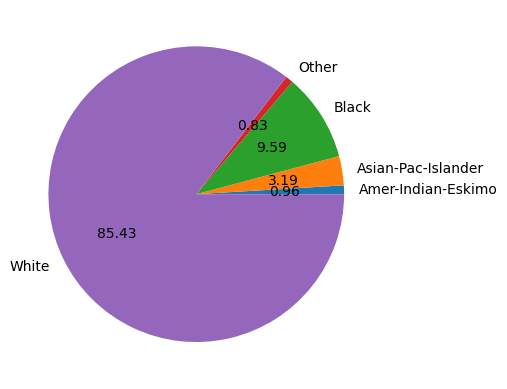

In [58]:
adult.groupby('race').size().plot(kind='pie', autopct='%.2f')

In [ ]:
#our accuracy and our model.eval() show what I was concerned about....our model accuracy simply picks white every time it seems

#SOLUTIONS
To help you get unstuck:

In [ ]:
# This is the solution for task 2.1 above

adult_dl = pd.DataFrame(adult, columns = ['age', 'educationyears', 'race','hoursperweek','incomeUSD'])
adult_dl.head()

,age,educationyears,race,hoursperweek,incomeUSD
0,39,13,White,40,43747
1,50,13,White,13,38907
2,38,9,White,40,25055
3,53,7,Black,40,26733
4,28,13,Black,40,23429


In [ ]:
adult_dl.race.unique()

array(['White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo',
       'Other'], dtype=object)